# **Dunyo transport statistikasi (havo, avtomobil, temir yo‘l)**

## **1-qadam. Kutubxonalarni chaqirish**
Kerakli kutubxonalarni yuklaymiz va sozlamalarni o'rnatamiz.

In [ ]:
import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Grafik sozlamalari
plt.style.use('seaborn-v0_8')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 8)

## **2-qadam. Ma'lumot ko'rsatkichlari va mamlakatlarni aniqlash**
World Bank ma'lumotlar bazasidagi transport ko'rsatkichlari va tahlil qilinadigan mamlakatlarni belgilaymiz.

In [ ]:
# Transport ko'rsatkichlari
transport_indicators = {
    "IS.AIR.PSGR": "Havo_yoʻlovchilari",
    "IS.AIR.GOOD.MT.K1": "Havo_yuk_tashish",
    "IS.RRS.TOTL.KM": "Temir_yoʻl_uzunligi",
    "IS.RRS.PASG.KM": "Temir_yoʻl_yoʻlovchilari"
}

# Tahlil qilinadigan mamlakatlar
countries = ["USA", "CHN", "IND", "JPN", "DEU", "UZB"]

## **3-qadam. Ma'lumotlarni yuklab olish**
World Bank API orqali transport statistik ma'lumotlarini yuklaymiz.

In [ ]:
# Ma'lumotlarni yuklash
df = wbdata.get_dataframe(transport_indicators, country=countries)

# Ma'lumotlarni qayta ishlash
df_reset = df.reset_index()
df_reset['year'] = pd.to_datetime(df_reset['date']).dt.year

# 2010-2021 yillar oralig'ini ajratib olish
df_2010_2021 = df_reset[df_reset['year'].between(2010, 2021)]

# print("Ma'lumotlar muvaffaqiyatli yuklandi!")
# print(f"Jami qatorlar: {len(df_2010_2021)}")
# print(f"Mamlakatlar: {', '.join(df_2010_2021['country'].unique())}")

## **4-qadam. Havo transporti yo'lovchilari jadvali**
Mamlakatlar kesimida 2010-2021 yillar oralig'ida havo transporti yo'lovchilari sonini ko'rsatadigan jadval.

In [ ]:
# Havo transporti yo'lovchilari jadvali
air_passengers_table = df_2010_2021.pivot_table(
    index='country',
    columns='year',
    values='Havo_yoʻlovchilari'
) / 1000000  # millionga aylantiramiz

# Jadvalni chiroyli ko'rinishda chiqarish
print("📊 HAVO TRANSPORTI YO'LOVCHILARI (million)")
print("=" * 60)
air_passengers_styled = air_passengers_table.round(2).style\
    .background_gradient(cmap='Blues')\
    .format("{:.2f}")\
    .set_caption("2010-2021 yillar oralig'ida havo transporti yo'lovchilari soni (million)")

display(air_passengers_styled)

📊 HAVO TRANSPORTI YO'LOVCHILARI (million)


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
China,266.29,292.16,318.48,352.80,390.88,436.18,487.96,551.23,611.44,659.63,417.26,440.30
Germany,97.33,107.04,105.98,109.06,112.35,117.22,116.71,114.16,109.80,109.63,25.76,33.07
India,64.37,74.00,72.15,75.59,82.72,98.93,119.58,139.75,164.04,167.50,68.96,83.96
Japan,109.62,89.79,98.91,107.57,110.55,114.13,117.71,123.90,126.39,130.23,51.13,45.41
United States,720.50,730.80,736.70,743.17,762.71,798.22,824.04,849.40,889.02,926.74,369.50,666.15
Uzbekistan,2.11,2.28,2.59,2.61,2.55,2.49,2.38,2.58,3.06,3.69,0.93,2.01


## **5-qadam. Temir yo'l uzunligi jadvali**
Mamlakatlar kesimida temir yo'l uzunligini ko'rsatadigan jadval.

In [ ]:
# Temir yo'l uzunligi jadvali
rail_length_table = df_2010_2021.pivot_table(
    index='country',
    columns='year',
    values='Temir_yoʻl_uzunligi'
) / 1000  # ming km ga aylantiramiz

print("🚆 TEMIR YO'L UZUNLIGI (ming km)")
print("=" * 50)
rail_length_styled = rail_length_table.round(1).style\
    .background_gradient(cmap='Greens')\
    .format("{:.1f}")\
    .set_caption("2010-2021 yillar oralig'ida temir yo'l uzunligi (ming km)")

display(rail_length_styled)

🚆 TEMIR YO'L UZUNLIGI (ming km)


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
China,66.2,72.5,85.8,79.3,85.3,90.0,91.7,93.7,96.4,102.5,106.2,109.8
Germany,33.7,33.6,33.5,33.4,33.4,33.3,33.4,33.5,33.4,33.4,33.4,33.4
India,64.0,64.5,64.6,65.4,65.8,66.0,66.7,67.4,69.2,67.4,68.0,68.1
Japan,20.1,20.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
United States,194.4,194.1,153.5,154.3,152.9,151.7,151.3,151.0,150.5,149.5,148.7,148.6
Uzbekistan,4.2,4.3,4.2,4.2,4.2,4.2,4.3,4.6,4.6,4.7,4.7,4.7


## **6-qadam. Havo transporti yuk tashish jadvali**
Havo transporti orqali yuk tashish hajmini ko'rsatadigan jadval.

In [ ]:
# Havo transporti yuk tashish jadvali
air_freight_table = df_2010_2021.pivot_table(
    index='country',
    columns='year',
    values='Havo_yuk_tashish'
)

print("✈️ HAVO TRANSPORTI YUK TASHISH (mln tonna-km)")
print("=" * 55)
air_freight_styled = air_freight_table.round(1).style\
    .background_gradient(cmap='Oranges')\
    .format("{:.1f}")\
    .set_caption("2010-2021 yillar oralig'ida havo transporti yuk tashish (mln tonna-km)")

display(air_freight_styled)

✈️ HAVO TRANSPORTI YUK TASHISH (mln tonna-km)


year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
China,17193.9,16764.9,15568.8,16053.7,17822.6,19805.6,21304.6,23323.6,25256.2,25394.6,19264.2,20961.2
Germany,7487.5,7716.8,7237.0,7335.7,7184.1,6986.4,6942.7,7901.7,7969.9,7763.6,9166.4,11533.0
India,1631.0,1702.7,1579.2,1733.8,1851.3,1833.8,1893.9,2407.1,2704.0,1938.2,875.1,907.9
Japan,7698.8,6545.9,7045.8,7715.9,8661.8,8661.8,9360.9,10684.6,9420.7,8919.5,7841.5,10947.0
United States,39353.3,39621.9,39111.3,37113.6,38225.2,37866.2,38657.9,41591.6,42985.3,42498.3,40793.1,46004.6
Uzbekistan,153.7,153.8,110.7,99.0,110.2,114.3,112.3,126.8,89.4,70.5,20.0,38.0


## **7-qadam. 2021 yil solishtirma jadvali**
2021 yil uchun barcha transport ko'rsatkichlarini solishtirma ko'rsatadigan jadval.

In [ ]:
# 2021 yil ma'lumotlari
latest_data = df_2010_2021[df_2010_2021['year'] == 2021]

# Solishtirma jadval yaratish
comparison_table = latest_data[['country', 'Havo_yoʻlovchilari', 'Havo_yuk_tashish',
                               'Temir_yoʻl_uzunligi', 'Temir_yoʻl_yoʻlovchilari']].copy()

# Formatlash
comparison_table['Havo_yoʻlovchilari'] = (comparison_table['Havo_yoʻlovchilari'] / 1000000).round(2)
comparison_table['Havo_yuk_tashish'] = comparison_table['Havo_yuk_tashish'].round(1)
comparison_table['Temir_yoʻl_uzunligi'] = (comparison_table['Temir_yoʻl_uzunligi'] / 1000).round(1)
comparison_table['Temir_yoʻl_yoʻlovchilari'] = (comparison_table['Temir_yoʻl_yoʻlovchilari'] / 1000).round(2)

# Jadvalni chiroyli ko'rinishda chiqarish
print("🏆 2021 YIL TRANSPORT KO'RSATKICHLARI SOLISHTIRMASI")
print("=" * 65)

comparison_styled = comparison_table.style\
    .bar(subset=['Havo_yoʻlovchilari'], color='#5fba7d')\
    .bar(subset=['Havo_yuk_tashish'], color='#ff6b6b')\
    .bar(subset=['Temir_yoʻl_uzunligi'], color='#4ecdc4')\
    .bar(subset=['Temir_yoʻl_yoʻlovchilari'], color='#ffd166')\
    .format({
        'Havo_yoʻlovchilari': '{:.2f}M',
        'Havo_yuk_tashish': '{:.1f}',
        'Temir_yoʻl_uzunligi': '{:.1f}K',
        'Temir_yoʻl_yoʻlovchilari': '{:.2f}B'
    })\
    .set_caption("2021 yil transport ko'rsatkichlari solishtirmasi")

display(comparison_styled)

🏆 2021 YIL TRANSPORT KO'RSATKICHLARI SOLISHTIRMASI


,country,Havo_yoʻlovchilari,Havo_yuk_tashish,Temir_yoʻl_uzunligi,Temir_yoʻl_yoʻlovchilari
3,China,440.30M,20961.2,109.8K,946.50B
68,Germany,33.07M,11533.0,33.4K,nanB
133,India,83.96M,907.9,68.1K,231.13B
198,Japan,45.41M,10947.0,nanK,nanB
263,United States,666.15M,46004.6,148.6K,nanB
328,Uzbekistan,2.01M,38.0,4.7K,3.13B


## **8-qadam. Havo transporti yo'lovchilari grafigi**
Vaqt o'tishi bilan havo transporti yo'lovchilarining o'zgarishini ko'rsatadigan grafik.

=== HAVO TRANSPORTI YO'LOVCHILARI GRAFIKI ===
Ma'lumotlarni chuqur tekshirish:
China: 12 ta ma'lumot, qiymatlar: [440301216.0, 417255845.0, 659629070.0, 611439830.0, 551234509.0, 487960477.0, 436183969.0, 390878784.0, 352795296.0, 318475924.0, 292160158.0, 266293020.0]
Germany: 12 ta ma'lumot, qiymatlar: [33073180.0, 25758450.0, 109633750.727, 109796202.17431, 114160685.0, 116713587.0, 117222850.0, 112353098.59355, 109062321.51578, 105978474.526384, 107042775.791182, 97330734.2807591]
India: 12 ta ma'lumot, qiymatlar: [83964797.0, 68959633.0, 167499116.0, 164035637.545, 139752424.0, 119577835.0, 98927860.0, 82718882.88, 75589071.0, 72151828.8895485, 73996912.0, 64374253.8038964]
Japan: 12 ta ma'lumot, qiymatlar: [45410146.0, 51131122.0, 130233352.0, 126387527.0, 123898000.0, 117708000.0, 114128000.0, 110547000.0, 107573000.0, 98907859.0, 89788818.0, 109617020.965748]
United States: 12 ta ma'lumot, qiymatlar: [666153000.0, 369501000.0, 926737000.0, 889024000.0, 849403000.0, 824039000.0,

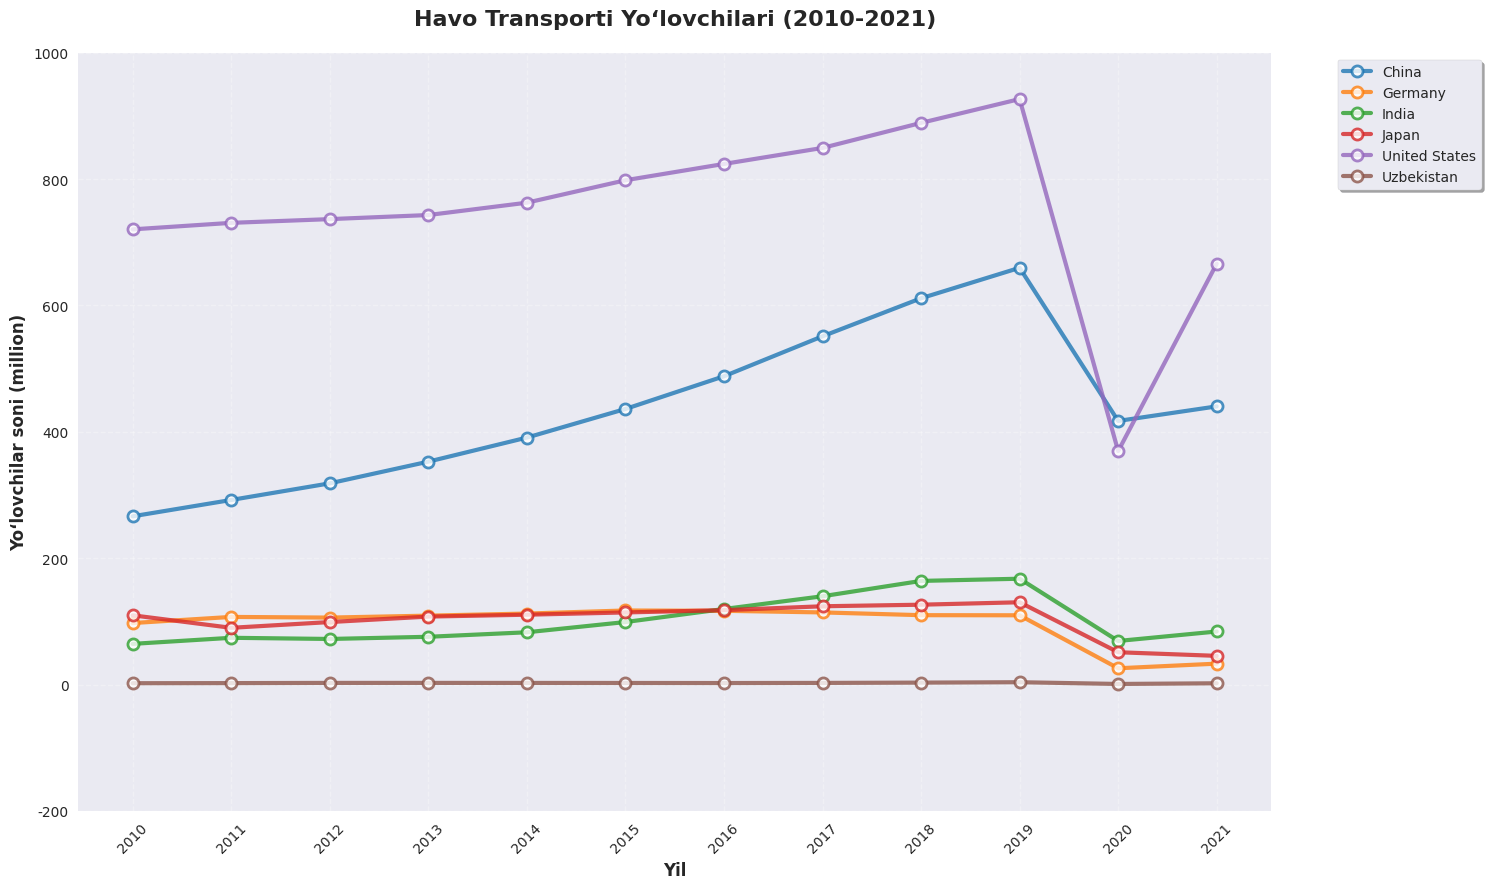


📊 Havo transporti yo'lovchilari statistikasi:
• China: 12 yil ma'lumot, o'rtacha 435.4 million yo'lovchi
• Germany: 12 yil ma'lumot, o'rtacha 96.5 million yo'lovchi
• India: 12 yil ma'lumot, o'rtacha 101.0 million yo'lovchi
• Japan: 12 yil ma'lumot, o'rtacha 102.1 million yo'lovchi
• United States: 12 yil ma'lumot, o'rtacha 751.4 million yo'lovchi
• Uzbekistan: 12 yil ma'lumot, o'rtacha 2.4 million yo'lovchi


In [ ]:
# 8-qadam. Havo transporti yo'lovchilari grafigi (To'liq to'g'rilangan)
print("=== HAVO TRANSPORTI YO'LOVCHILARI GRAFIKI ===")

# Ma'lumotlarni chuqur tekshirish
print("Ma'lumotlarni chuqur tekshirish:")
for country in df_2010_2021['country'].unique():
    country_data = df_2010_2021[df_2010_2021['country'] == country]
    valid_data = country_data[country_data['Havo_yoʻlovchilari'].notna()]
    print(f"{country}: {len(valid_data)} ta ma'lumot, qiymatlar: {valid_data['Havo_yoʻlovchilari'].tolist()}")

# Grafikni chizish
plt.figure(figsize=(15, 9))

# Ranglar palettasi
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

has_data = False  # Ma'lumot mavjudligini tekshirish

for i, country in enumerate(df_2010_2021['country'].unique()):
    country_data = df_2010_2021[df_2010_2021['country'] == country]
    valid_data = country_data[country_data['Havo_yoʻlovchilari'].notna()]

    if not valid_data.empty:
        has_data = True
        # Ma'lumotlarni millionga aylantiramiz
        y_values = valid_data['Havo_yoʻlovchilari'] / 1000000
        x_values = valid_data['year']

        plt.plot(x_values, y_values,
                marker='o', linewidth=3, markersize=8,
                label=country, color=colors[i % len(colors)],
                linestyle='-', alpha=0.8, markerfacecolor='white',
                markeredgewidth=2, markeredgecolor=colors[i % len(colors)])

if has_data:
    plt.title("Havo Transporti Yoʻlovchilari (2010-2021)", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Yil', fontsize=12, fontweight='bold')
    plt.ylabel('Yoʻlovchilar soni (million)', fontsize=12, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, frameon=True, shadow=True)
    plt.grid(True, alpha=0.3, linestyle='--')

    # X o'qini sozlash
    plt.xticks(sorted(df_2010_2021['year'].unique()), rotation=45)

    # Y o'qini sozlash (ma'lumotlarga qarab)
    current_y_ticks = plt.yticks()[0]
    plt.yticks(current_y_ticks, [f'{int(y)}' for y in current_y_ticks])

    plt.tight_layout()
    plt.show()
else:
    print("❌ Hech qanday ma'lumot topilmadi. Grafik chizilmadi.")

# Qo'shimcha ma'lumot
print("\n📊 Havo transporti yo'lovchilari statistikasi:")
for country in df_2010_2021['country'].unique():
    country_data = df_2010_2021[df_2010_2021['country'] == country]
    valid_data = country_data[country_data['Havo_yoʻlovchilari'].notna()]
    if not valid_data.empty:
        avg_passengers = valid_data['Havo_yoʻlovchilari'].mean() / 1000000
        print(f"• {country}: {len(valid_data)} yil ma'lumot, o'rtacha {avg_passengers:.1f} million yo'lovchi")

## **9-qadam. Temir yo'l uzunligi grafigi**
Mamlakatlar kesimida temir yo'l uzunligining o'zgarishini ko'rsatadigan grafik.

=== MAVJUD TRANSPORT KO'RSATKICHLARI GRAFIKI ===
✅ Havo_yoʻlovchilari: Ma'lumot mavjud
✅ Havo_yuk_tashish: Ma'lumot mavjud
✅ Temir_yoʻl_uzunligi: Ma'lumot mavjud
✅ Temir_yoʻl_yoʻlovchilari: Ma'lumot mavjud

📈 4 ta ko'rsatkich uchun grafiklar chizilmoqda...


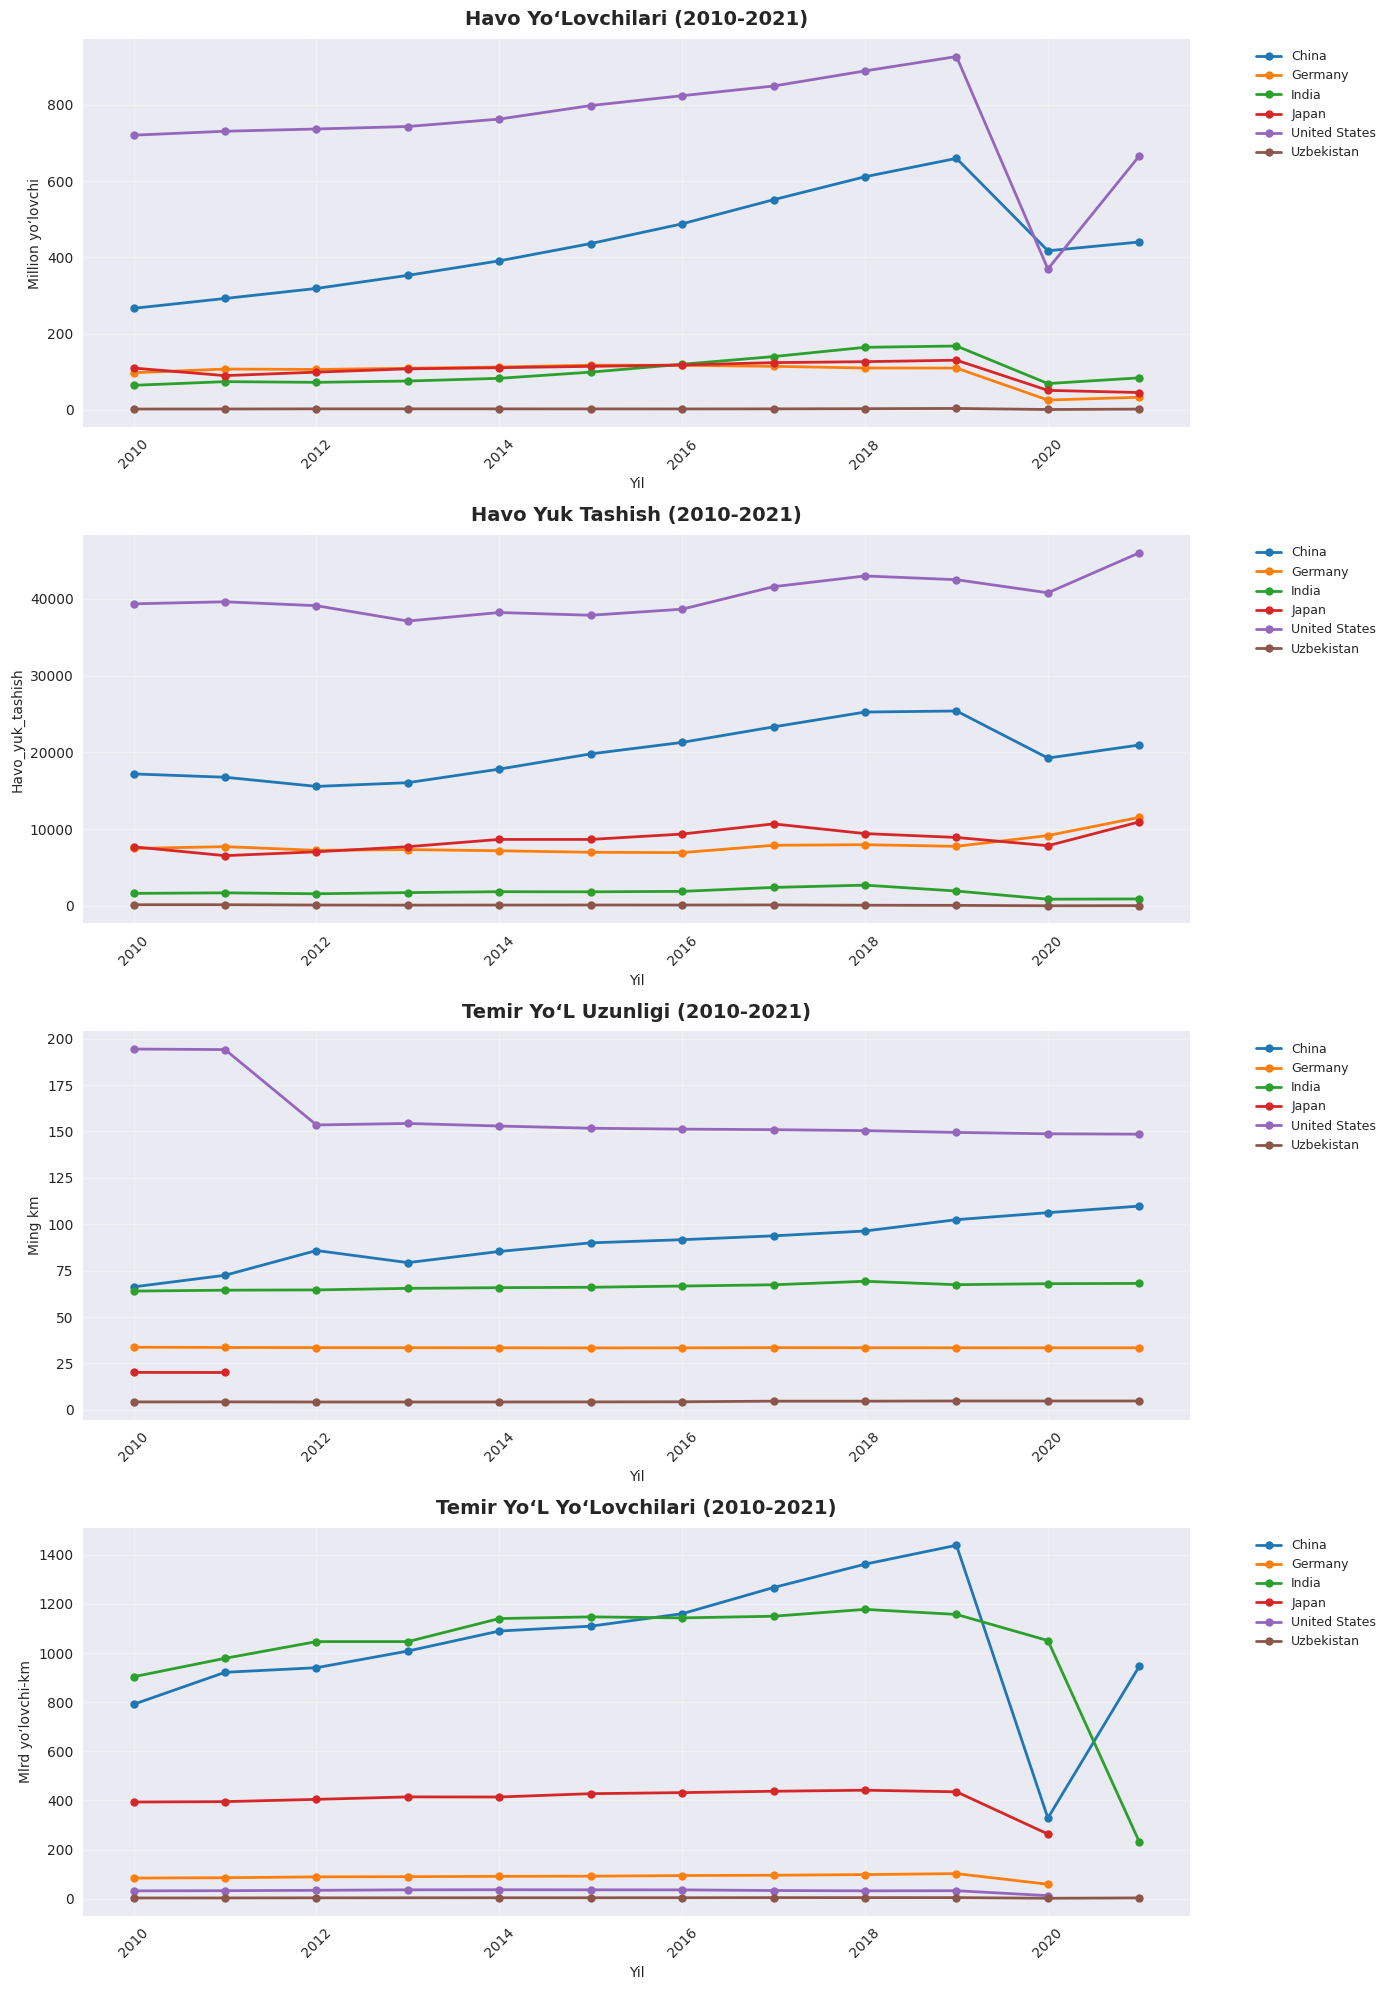

In [ ]:
# 9-qadam. Mavjud transport ko'rsatkichlari grafigi
print("=== MAVJUD TRANSPORT KO'RSATKICHLARI GRAFIKI ===")

# Qaysi ko'rsatkichlarda ma'lumot borligini tekshiramiz
available_indicators = []
for indicator in ['Havo_yoʻlovchilari', 'Havo_yuk_tashish', 'Temir_yoʻl_uzunligi', 'Temir_yoʻl_yoʻlovchilari']:
    if df_2010_2021[indicator].notna().any():
        available_indicators.append(indicator)
        print(f"✅ {indicator}: Ma'lumot mavjud")
    else:
        print(f"❌ {indicator}: Ma'lumot yo'q")

if available_indicators:
    print(f"\n📈 {len(available_indicators)} ta ko'rsatkich uchun grafiklar chizilmoqda...")

    # Grafiklar soni
    n_plots = len(available_indicators)
    fig, axes = plt.subplots(n_plots, 1, figsize=(14, 5*n_plots))

    # Agar faqat 1 ta grafik bo'lsa
    if n_plots == 1:
        axes = [axes]

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    for idx, indicator in enumerate(available_indicators):
        ax = axes[idx]
        has_plot_data = False

        for i, country in enumerate(df_2010_2021['country'].unique()):
            country_data = df_2010_2021[df_2010_2021['country'] == country]
            valid_data = country_data[country_data[indicator].notna()]

            if not valid_data.empty:
                has_plot_data = True
                y_values = valid_data[indicator]

                # Ko'rsatkich turiga qarab formatlash
                if indicator == 'Havo_yoʻlovchilari':
                    y_values = y_values / 1000000  # million
                    y_label = 'Million yoʻlovchi'
                elif indicator == 'Temir_yoʻl_uzunligi':
                    y_values = y_values / 1000  # ming km
                    y_label = 'Ming km'
                elif indicator == 'Temir_yoʻl_yoʻlovchilari':
                    y_values = y_values / 1000  # mlrd
                    y_label = 'Mlrd yoʻlovchi-km'
                else:
                    y_label = indicator

                ax.plot(valid_data['year'], y_values,
                       marker='o', linewidth=2, markersize=6,
                       label=country, color=colors[i % len(colors)])

        if has_plot_data:
            ax.set_title(f"{indicator.replace('_', ' ').title()} (2010-2021)",
                        fontsize=14, fontweight='bold', pad=10)
            ax.set_xlabel('Yil', fontsize=10)
            ax.set_ylabel(y_label, fontsize=10)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
            ax.grid(True, alpha=0.3)
            ax.tick_params(axis='x', rotation=45)
        else:
            ax.text(0.5, 0.5, f'{indicator} uchun ma\'lumot yo\'q',
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(f"{indicator.replace('_', ' ').title()} - Ma'lumot Yo'q",
                        fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("❌ Hech qanday ko'rsatkichda ma'lumot topilmadi.")

## **10-qadam. 2021 yil solishtirma grafiklari**
2021 yil uchun barcha transport ko'rsatkichlarini solishtirma ko'rsatadigan grafiklar.

=== 2021 YIL SOLISHTIRMA GRAFIKLARI ===
2021 yil ma'lumotlari tahlili:
China: Havo yo'lovchi=440.3M, Temir yo'l=110K km, Havo yuk=20961, Temir yo'l yo'lovchi=946.5B
Germany: Havo yo'lovchi=33.1M, Temir yo'l=33K km, Havo yuk=11533, Temir yo'l yo'lovchi=N/A
India: Havo yo'lovchi=84.0M, Temir yo'l=68K km, Havo yuk=908, Temir yo'l yo'lovchi=231.1B
Japan: Havo yo'lovchi=45.4M, Temir yo'l=N/A, Havo yuk=10947, Temir yo'l yo'lovchi=N/A
United States: Havo yo'lovchi=666.2M, Temir yo'l=149K km, Havo yuk=46005, Temir yo'l yo'lovchi=N/A
Uzbekistan: Havo yo'lovchi=2.0M, Temir yo'l=5K km, Havo yuk=38, Temir yo'l yo'lovchi=3.1B

📊 Chiziladigan grafiklar soni: 4


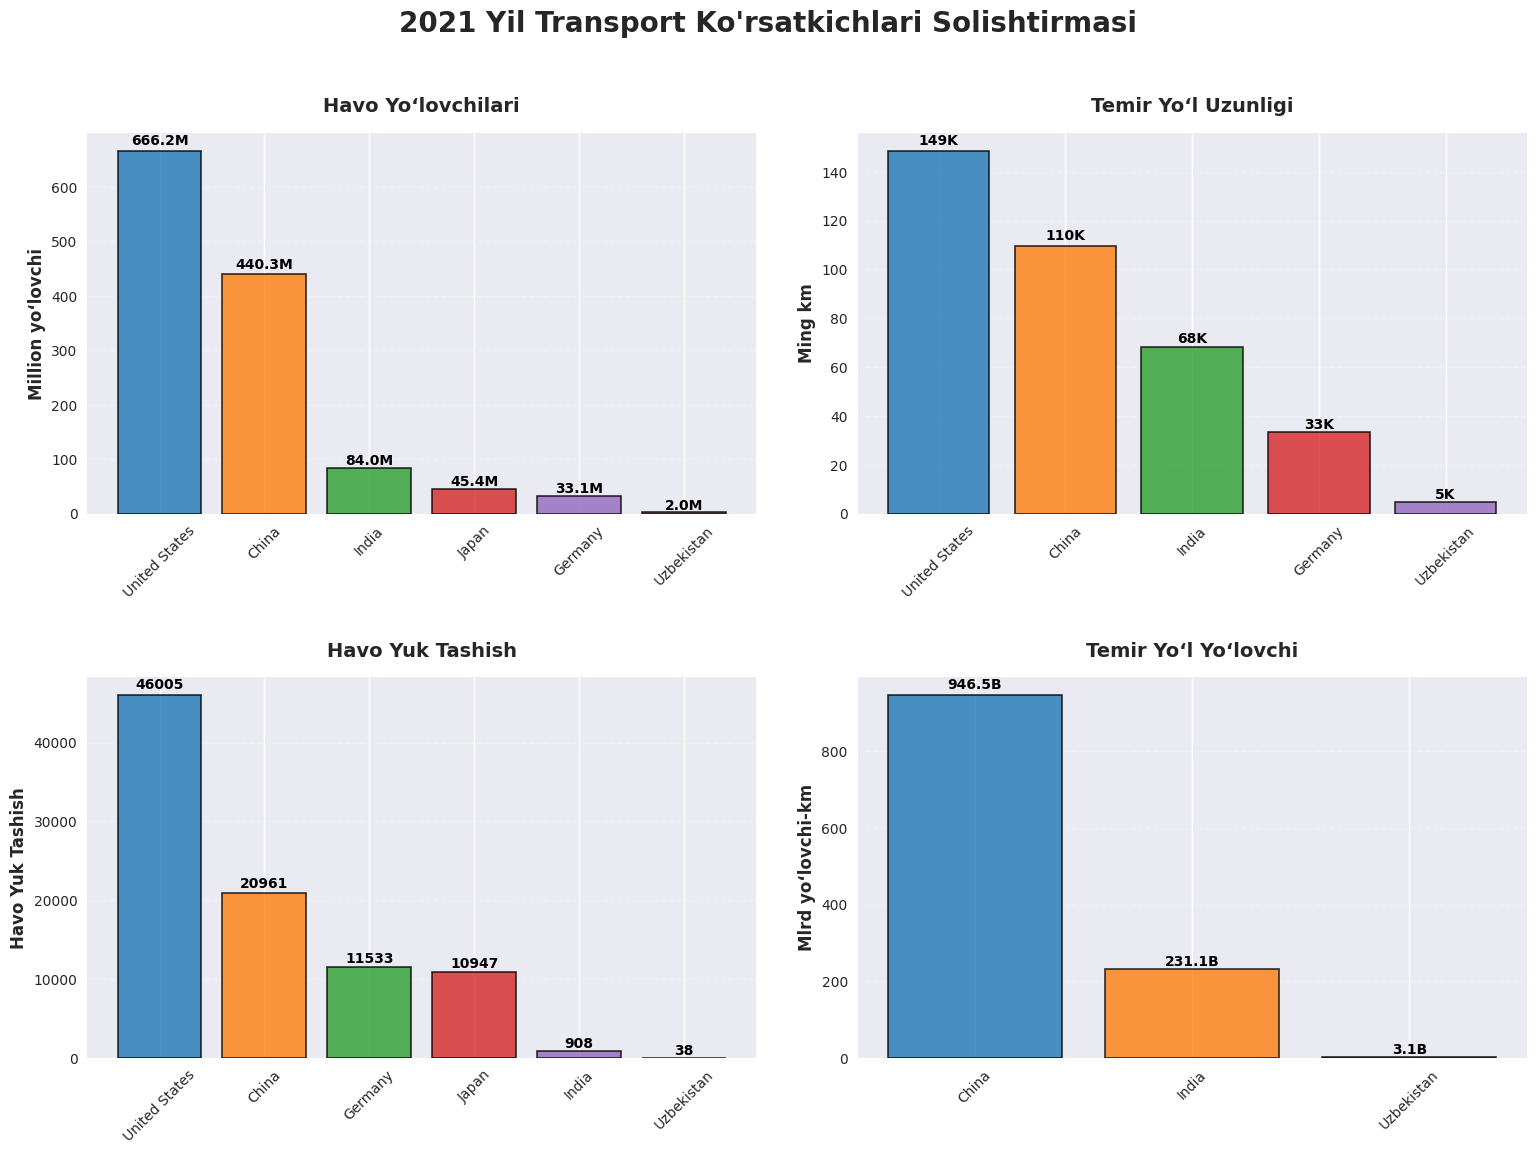


📈 2021 Yil Yetakchilari:
• Havo Yoʻlovchilari: United States (666.2M)
• Temir Yoʻl Uzunligi: United States (149K km)
• Havo Yuk Tashish: United States (46005)
• Temir Yoʻl Yoʻlovchi: China (946.5B)


In [ ]:
# 10-qadam. 2021 yil solishtirma grafiklari (Xatolik to'g'rilangan)
print("=== 2021 YIL SOLISHTIRMA GRAFIKLARI ===")

# 2021 yil ma'lumotlarini chuqur tekshirish
print("2021 yil ma'lumotlari tahlili:")
for index, row in latest_data.iterrows():
    # Har bir qiymatni alohida formatlash (xatolikni oldini olish uchun)
    havo_yo = f"{row['Havo_yoʻlovchilari']/1000000:.1f}M" if pd.notna(row['Havo_yoʻlovchilari']) else 'N/A'
    temir_yo = f"{row['Temir_yoʻl_uzunligi']/1000:.0f}K km" if pd.notna(row['Temir_yoʻl_uzunligi']) else 'N/A'
    havo_yuk = f"{row['Havo_yuk_tashish']:.0f}" if pd.notna(row['Havo_yuk_tashish']) else 'N/A'
    temir_yo_yo = f"{row['Temir_yoʻl_yoʻlovchilari']/1000:.1f}B" if pd.notna(row['Temir_yoʻl_yoʻlovchilari']) else 'N/A'

    print(f"{row['country']}: Havo yo'lovchi={havo_yo}, Temir yo'l={temir_yo}, Havo yuk={havo_yuk}, Temir yo'l yo'lovchi={temir_yo_yo}")

# Faqat ma'lumotlari bo'lgan ko'rsatkichlarni aniqlash
indicators_to_plot = []
for indicator, name in [('Havo_yoʻlovchilari', 'Havo Yoʻlovchilari'),
                       ('Temir_yoʻl_uzunligi', 'Temir Yoʻl Uzunligi'),
                       ('Havo_yuk_tashish', 'Havo Yuk Tashish'),
                       ('Temir_yoʻl_yoʻlovchilari', 'Temir Yoʻl Yoʻlovchi')]:
    if latest_data[indicator].notna().any():
        indicators_to_plot.append((indicator, name))

print(f"\n📊 Chiziladigan grafiklar soni: {len(indicators_to_plot)}")

if indicators_to_plot:
    # Grafik konfiguratsiyasi
    n_plots = len(indicators_to_plot)
    n_cols = 2
    n_rows = (n_plots + 1) // 2

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
    fig.suptitle('2021 Yil Transport Ko\'rsatkichlari Solishtirmasi',
                fontsize=20, fontweight='bold', y=0.98)

    # Agar faqat 1 ta grafik bo'lsa
    if n_plots == 1:
        axes = np.array([axes])
    elif n_plots == 2:
        axes = axes.reshape(1, 2)

    # Ranglar
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

    for idx, (indicator, title) in enumerate(indicators_to_plot):
        if n_rows == 1:
            ax = axes[idx] if n_plots > 1 else axes
        else:
            ax = axes[idx // n_cols, idx % n_cols]

        # Faqat ma'lumoti bo'lgan mamlakatlarni olish
        valid_data = latest_data[latest_data[indicator].notna()].sort_values(indicator, ascending=False)

        if not valid_data.empty:
            # Ko'rsatkich turiga qarab formatlash
            if indicator == 'Havo_yoʻlovchilari':
                values = valid_data[indicator] / 1000000
                y_label = 'Million yoʻlovchi'
                suffix = 'M'
                format_str = '{:.1f}'
            elif indicator == 'Temir_yoʻl_uzunligi':
                values = valid_data[indicator] / 1000
                y_label = 'Ming km'
                suffix = 'K'
                format_str = '{:.0f}'
            elif indicator == 'Temir_yoʻl_yoʻlovchilari':
                values = valid_data[indicator] / 1000
                y_label = 'Mlrd yoʻlovchi-km'
                suffix = 'B'
                format_str = '{:.1f}'
            else:
                values = valid_data[indicator]
                y_label = title
                suffix = ''
                format_str = '{:.0f}'

            bars = ax.bar(valid_data['country'], values,
                         color=colors[:len(valid_data)],
                         edgecolor='black', linewidth=1.2,
                         alpha=0.8)

            ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
            ax.set_ylabel(y_label, fontsize=12, fontweight='bold')
            ax.tick_params(axis='x', rotation=45)
            ax.grid(axis='y', alpha=0.3, linestyle='--')

            # Qiymatlarni grafik ustiga yozish
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                       f'{format_str.format(height)}{suffix}',
                       ha='center', va='bottom',
                       fontweight='bold', fontsize=10,
                       color='black')
        else:
            ax.text(0.5, 0.5, 'Ma\'lumotlar mavjud emas',
                   ha='center', va='center', transform=ax.transAxes, fontsize=12)
            ax.set_title(title, fontsize=14, fontweight='bold')

    # Qolgan joylarni bo'shatish
    for idx in range(len(indicators_to_plot), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        if n_rows == 1:
            if n_plots > 1:
                fig.delaxes(axes[col])
            else:
                pass  # Faqat 1 ta grafik bo'lsa, hech narsa qilmaymiz
        else:
            fig.delaxes(axes[row, col])

    plt.tight_layout(pad=3.0)
    plt.show()

    # Statistik xulosa
    print("\n📈 2021 Yil Yetakchilari:")
    for indicator, title in indicators_to_plot:
        if latest_data[indicator].notna().any():
            leader = latest_data.loc[latest_data[indicator].idxmax(), 'country']
            max_value = latest_data[indicator].max()

            if indicator == 'Havo_yoʻlovchilari':
                formatted_value = f"{max_value/1000000:.1f}M"
            elif indicator == 'Temir_yoʻl_uzunligi':
                formatted_value = f"{max_value/1000:.0f}K km"
            elif indicator == 'Temir_yoʻl_yoʻlovchilari':
                formatted_value = f"{max_value/1000:.1f}B"
            else:
                formatted_value = f"{max_value:.0f}"

            print(f"• {title}: {leader} ({formatted_value})")
else:
    print("❌ 2021 yil uchun hech qanday ma'lumot topilmadi.")

## **11-qadam. O'zbekiston transport statistikasi**
O'zbekistonning transport ko'rsatkichlarini alohida tahlil qilish.

In [ ]:
# O'zbekiston transport statistikasi
uzbekistan_data = df_2010_2021[df_2010_2021['country'] == 'Uzbekistan']

print("🇺🇿 O'ZBEKISTON TRANSPORT STATISTIKASI (2010-2021)")
print("=" * 55)

uzbekistan_table = uzbekistan_data[['year', 'Havo_yoʻlovchilari', 'Havo_yuk_tashish',
                                   'Temir_yoʻl_uzunligi', 'Temir_yoʻl_yoʻlovchilari']].copy()

# Formatlash
uzbekistan_table['Havo_yoʻlovchilari'] = (uzbekistan_table['Havo_yoʻlovchilari'] / 1000000).round(3)
uzbekistan_table['Havo_yuk_tashish'] = uzbekistan_table['Havo_yuk_tashish'].round(1)
uzbekistan_table['Temir_yoʻl_uzunligi'] = (uzbekistan_table['Temir_yoʻl_uzunligi'] / 1000).round(2)
uzbekistan_table['Temir_yoʻl_yoʻlovchilari'] = (uzbekistan_table['Temir_yoʻl_yoʻlovchilari'] / 1000).round(2)

uzbekistan_styled = uzbekistan_table.style\
    .background_gradient(subset=['Havo_yoʻlovchilari'], cmap='Blues')\
    .background_gradient(subset=['Havo_yuk_tashish'], cmap='Oranges')\
    .background_gradient(subset=['Temir_yoʻl_uzunligi'], cmap='Greens')\
    .background_gradient(subset=['Temir_yoʻl_yoʻlovchilari'], cmap='Purples')\
    .format({
        'Havo_yoʻlovchilari': '{:.3f}M',
        'Havo_yuk_tashish': '{:.1f}',
        'Temir_yoʻl_uzunligi': '{:.2f}K',
        'Temir_yoʻl_yoʻlovchilari': '{:.2f}B'
    })\
    .set_caption("O'zbekiston transport ko'rsatkichlari (2010-2021)")

display(uzbekistan_styled)

🇺🇿 O'ZBEKISTON TRANSPORT STATISTIKASI (2010-2021)


,year,Havo_yoʻlovchilari,Havo_yuk_tashish,Temir_yoʻl_uzunligi,Temir_yoʻl_yoʻlovchilari
328,2021,2.011M,38.0,4.73K,3.13B
329,2020,0.934M,20.0,4.73K,1.80B
330,2019,3.685M,70.5,4.74K,4.38B
331,2018,3.057M,89.4,4.64K,4.33B
332,2017,2.582M,126.8,4.64K,4.29B
333,2016,2.384M,112.3,4.30K,3.93B
334,2015,2.487M,114.3,4.24K,3.76B
335,2014,2.546M,110.2,4.20K,3.76B
336,2013,2.614M,99.0,4.19K,nanB
337,2012,2.594M,110.7,4.19K,3.44B


## **12-qadam.Xulosa va statistik ma'lumotlar**
Transport statistikasi bo'yicha asosiy xulosalar.


In [ ]:
print("📈 TRANSPORT STATISTIKASI XULOSASI")
print("=" * 40)

print(f"\n📊 Umumiy ma'lumotlar:")
print(f"• Tahlil qilingan davr: 2010-2021")
print(f"• Mamlakatlar soni: {len(countries)}")
print(f"• Ko'rsatkichlar soni: {len(transport_indicators)}")

print(f"\n🏆 2021 yil yetakchilari:")
air_leader = latest_data.loc[latest_data['Havo_yoʻlovchilari'].idxmax(), 'country']
rail_length_leader = latest_data.loc[latest_data['Temir_yoʻl_uzunligi'].idxmax(), 'country']
air_freight_leader = latest_data.loc[latest_data['Havo_yuk_tashish'].idxmax(), 'country']
rail_pass_leader = latest_data.loc[latest_data['Temir_yoʻl_yoʻlovchilari'].idxmax(), 'country']

print(f"• Havo transporti yo'lovchilari: {air_leader}")
print(f"• Temir yo'l uzunligi: {rail_length_leader}")
print(f"• Havo transporti yuk tashish: {air_freight_leader}")
print(f"• Temir yo'l yo'lovchi tashish: {rail_pass_leader}")

# O'zbekiston ko'rsatkichlari
uz_2021 = latest_data[latest_data['country'] == 'Uzbekistan']
if not uz_2021.empty:
    print(f"\n🇺🇿 O'zbekiston 2021 yil ko'rsatkichlari:")
    print(f"• Havo yo'lovchilari: {uz_2021['Havo_yoʻlovchilari'].values[0]/1000000:.2f} million")
    print(f"• Temir yo'l uzunligi: {uz_2021['Temir_yoʻl_uzunligi'].values[0]/1000:.1f} ming km")
    print(f"• Havo yuk tashish: {uz_2021['Havo_yuk_tashish'].values[0]:.0f} mln tonna-km")
    print(f"• Temir yo'l yo'lovchi tashish: {uz_2021['Temir_yoʻl_yoʻlovchilari'].values[0]/1000:.2f} mlrd yo'lovchi-km")

📈 TRANSPORT STATISTIKASI XULOSASI

📊 Umumiy ma'lumotlar:
• Tahlil qilingan davr: 2010-2021
• Mamlakatlar soni: 6
• Ko'rsatkichlar soni: 4

🏆 2021 yil yetakchilari:
• Havo transporti yo'lovchilari: United States
• Temir yo'l uzunligi: United States
• Havo transporti yuk tashish: United States
• Temir yo'l yo'lovchi tashish: China

🇺🇿 O'zbekiston 2021 yil ko'rsatkichlari:
• Havo yo'lovchilari: 2.01 million
• Temir yo'l uzunligi: 4.7 ming km
• Havo yuk tashish: 38 mln tonna-km
• Temir yo'l yo'lovchi tashish: 3.13 mlrd yo'lovchi-km
